In [231]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import json
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize


In [33]:

##Convert Dataset fron JSON to CSV
my_list = []
with open('MDataset_Type1.json') as json_data:
    for line in json_data:
        #line = line.replace('\\','')
         my_list.append(json.loads(line))
        
data = json_normalize(my_list)       

In [34]:
df = DataFrame(data)

In [35]:
df.head()

,_id.$oid,entityId,entityType,event,eventTime,properties.api_resolv,properties.cmd_exec,properties.file_access,properties.file_delete,properties.file_drop,...,properties.sig_stealth_hidden_extension,properties.sig_stealth_hiddenreg,properties.sig_stealth_hide_notifications,properties.sig_stealth_network,properties.sig_stealth_timeout,properties.sig_stealth_webhistory,properties.sig_stealth_window,properties.sig_virus,properties.sig_yara_detection,properties.str
0,59f8b39fa2611a307b44c4c1,652,content,malware,2016-12-15T09:01:34.646+0000,e326ee78 74c078a1 10da5cb2 09194786 0fc19269 2...,NaN,d5197d93 c3581516 45b96339 45b96339 0976bdd4 e...,NaN,00000000 8d777f38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916e7571 ec73657d e4787bb1 36c67c0f f48801f1 1...
1,59f8b3a0a2611a307b44c4c7,653,content,malware,2016-12-15T09:01:34.739+0000,e326ee78 74c078a1 10da5cb2 09194786 0fc19269 2...,NaN,d5197d93 c3581516 45b96339 45b96339 0976bdd4 e...,NaN,00000000 8d777f38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916e7571 ec73657d e4787bb1 1f9f1073 36c67c0f f...
2,59f8b3a0a2611a307b44c4cd,654,content,malware,2016-12-15T09:01:34.750+0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b7b66a05 b1846b11 15116837 853e5266 cc0af601 c...
3,59f8b3a0a2611a307b44c4d3,655,content,malware,2016-12-15T09:01:34.764+0000,d847e1f5 b5d56eb9 4569fb45 a3391897 87b97cb4 8...,8d6095a6 9bc65c2a 363b122c 57c36376 f5ddaf0c 2...,3d801aa5 385273e4 98e83379 2e5d8aa3 385273e4 9...,NaN,00004400 a4a7d960,...,NaN,NaN,NaN,NaN,86b85742,NaN,d809c822 1d733e6d,NaN,NaN,916e7571 ec73657d e4787bb1 1f9f1073 95d13c86 9...
4,59f8b3a0a2611a307b44c4d9,656,content,malware,2016-12-15T09:01:34.776+0000,c0b14a53 ec2b83df 02eb14e7 8e16a687 cc9bfd1e 1...,NaN,3d801aa5 350fd223 98e83379 bda9f42e 249a6812 0...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916e7571 ec73657d e4787bb1 0d2019da 130097cf 6...


In [36]:
df.describe()

,entityId
count,6.214000e+03
mean,3.589595e+05
std,6.497529e+05
min,5.200000e+01
25%,1.379000e+03
50%,2.156000e+03
75%,2.935750e+03
max,1.577983e+06


In [37]:
df.columns

Index(['_id.$oid', 'entityId', 'entityType', 'event', 'eventTime',
       'properties.api_resolv', 'properties.cmd_exec',
       'properties.file_access', 'properties.file_delete',
       'properties.file_drop',
       ...
       'properties.sig_stealth_hidden_extension',
       'properties.sig_stealth_hiddenreg',
       'properties.sig_stealth_hide_notifications',
       'properties.sig_stealth_network', 'properties.sig_stealth_timeout',
       'properties.sig_stealth_webhistory', 'properties.sig_stealth_window',
       'properties.sig_virus', 'properties.sig_yara_detection',
       'properties.str'],
      dtype='object', length=156)

# Dataset first processing stages

In [77]:
import pandas as pd
import re
#Renaming columns

df2 = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns
df2 = df.rename(columns={c: c.replace('properties.sig_', '') for c in df.columns}) # Remove properties. from columns
df2 = df.rename(columns={c: c.replace('properties.', '') for c in df.columns}) # Remove properties. from columns
    

In [78]:
df2.columns

Index(['_id.$oid', 'entityId', 'entityType', 'event', 'eventTime',
       'api_resolv', 'cmd_exec', 'file_access', 'file_delete', 'file_drop',
       ...
       'sig_stealth_hidden_extension', 'sig_stealth_hiddenreg',
       'sig_stealth_hide_notifications', 'sig_stealth_network',
       'sig_stealth_timeout', 'sig_stealth_webhistory', 'sig_stealth_window',
       'sig_virus', 'sig_yara_detection', 'str'],
      dtype='object', length=156)

In [79]:
#cutting unuseful features
df2 = df2.iloc[:,5:]

In [80]:
df2.shape

(6214, 151)

In [81]:
df2.columns

Index(['api_resolv', 'cmd_exec', 'file_access', 'file_delete', 'file_drop',
       'file_read', 'file_write', 'label', 'mutex_access', 'net_con',
       ...
       'sig_stealth_hidden_extension', 'sig_stealth_hiddenreg',
       'sig_stealth_hide_notifications', 'sig_stealth_network',
       'sig_stealth_timeout', 'sig_stealth_webhistory', 'sig_stealth_window',
       'sig_virus', 'sig_yara_detection', 'str'],
      dtype='object', length=151)

In [82]:
df2 = df2.set_index('label')

In [83]:
df2.head()
df2.columns

Index(['api_resolv', 'cmd_exec', 'file_access', 'file_delete', 'file_drop',
       'file_read', 'file_write', 'mutex_access', 'net_con', 'net_dns',
       ...
       'sig_stealth_hidden_extension', 'sig_stealth_hiddenreg',
       'sig_stealth_hide_notifications', 'sig_stealth_network',
       'sig_stealth_timeout', 'sig_stealth_webhistory', 'sig_stealth_window',
       'sig_virus', 'sig_yara_detection', 'str'],
      dtype='object', length=150)

In [84]:
#checking the dataset for any duplications
df2.duplicated()

label
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                        

In [85]:
df2 = df2.drop_duplicates()

In [86]:
df2.duplicated()

label
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                        

In [87]:
# create a function that counts the number of cell elements(Evidences)
def count_cell_elements(x):
    # that, if x is a string,
    if type(x) is not str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 100
    elif x:
        return len(x.split())
        
    # and leave everything else
    else:
        return 

In [88]:
df2 = df2.applymap(count_cell_elements)

In [89]:
df2.duplicated()

label
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                        

In [90]:
df2 = df2.drop_duplicates()

In [91]:
df2.duplicated()

label
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                                    False
APT1                        

In [92]:
df2.head()

,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,net_dns,...,sig_stealth_hidden_extension,sig_stealth_hiddenreg,sig_stealth_hide_notifications,sig_stealth_network,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str
label,,,,,,,,,,,,,,,,,,,,,
APT1,37.0,NaN,12.0,NaN,2.0,9.0,3.0,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0
APT1,39.0,NaN,12.0,NaN,2.0,9.0,3.0,1.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0
APT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
APT1,14.0,32.0,12.0,NaN,2.0,6.0,3.0,1.0,3.0,16.0,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,186.0
APT1,17.0,NaN,24.0,NaN,NaN,9.0,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0


In [93]:
df2.shape

(4464, 150)

In [94]:
#Drop all COLUMNS where all cells have missing values
df2 = df2.dropna(axis=1, how='all')

In [95]:
df2.shape

(4464, 88)

In [96]:
df2.columns

Index(['api_resolv', 'cmd_exec', 'file_access', 'file_delete', 'file_drop',
       'file_read', 'file_write', 'mutex_access', 'net_con', 'net_dns',
       'net_http', 'pe_imports', 'pe_sec_character', 'pe_sec_entropy',
       'pe_sec_name', 'reg_access', 'reg_delete', 'reg_read', 'reg_write',
       'service_create', 'service_start', 'sig_Threat Crowd Resolutions',
       'sig_antianalysis_detectfile', 'sig_antiav_detectfile',
       'sig_antiav_detectreg', 'sig_antiav_servicestop', 'sig_antidbg_windows',
       'sig_antisandbox_cuckoocrash', 'sig_antisandbox_sleep',
       'sig_antisandbox_suspend', 'sig_antisandbox_unhook',
       'sig_antivirus_virustotal', 'sig_antivm_vbox_files', 'sig_api_spamming',
       'sig_banker_zeus_mutex', 'sig_banker_zeus_url', 'sig_bcdedit_command',
       'sig_clamav', 'sig_copies_self', 'sig_creates_largekey',
       'sig_creates_nullvalue', 'sig_critical_process',
       'sig_disables_browser_warn', 'sig_downloader_cabby', 'sig_driver_load',
       's

In [97]:
df2 = df2.reset_index()

In [98]:
#chosing the most occuring families of malware
df2 = df2[df2['label'].isin(['APT1','Crypto','Locker','Zeus','shadowbrokers'])]

In [99]:
df2.shape

(4286, 89)

In [100]:
df2.head()

,label,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,...,sig_static_detection,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str
0,APT1,37.0,NaN,12.0,NaN,2.0,9.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0
1,APT1,39.0,NaN,12.0,NaN,2.0,9.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0
2,APT1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
3,APT1,14.0,32.0,12.0,NaN,2.0,6.0,3.0,1.0,3.0,...,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,186.0
4,APT1,17.0,NaN,24.0,NaN,NaN,9.0,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0


In [101]:
df2_no_label = df2.drop(columns='label')

In [102]:
df2_label_only = df2['label']

In [104]:
df2 = pd.concat([df2_no_label,df2_label_only],axis=1)

In [106]:
df2.head()

,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,net_dns,...,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str,label
0,37.0,NaN,12.0,NaN,2.0,9.0,3.0,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,APT1
1,39.0,NaN,12.0,NaN,2.0,9.0,3.0,1.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0,APT1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,APT1
3,14.0,32.0,12.0,NaN,2.0,6.0,3.0,1.0,3.0,16.0,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,186.0,APT1
4,17.0,NaN,24.0,NaN,NaN,9.0,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,APT1


# Exploratory analysis

In [111]:
df2.shape

(4286, 89)

Through description, we can see that the dataset has many missing values and is not normalized.

In [109]:
# descriptions, change precision to 3 places
set_option('precision', 3)
df2.describe()

,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,net_dns,...,sig_static_detection,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str
count,3232.000,957.000,3223.000,1003.000,1415.000,3174.000,1472.000,1351.000,187.000,275.000,...,324.000,1430.000,1.0,567.000,709.0,6.000,282.000,228.000,1.0,4284.000
mean,224.670,36.044,120.849,14.489,8.328,44.878,38.578,10.703,6.273,8.785,...,2.568,1.214,1.0,6.513,1.0,156.000,3.996,8.526,1.0,617.464
std,235.515,93.688,389.184,59.071,31.251,180.313,293.363,17.881,9.802,5.898,...,0.995,0.469,NaN,20.944,0.0,4.648,10.392,32.051,NaN,3029.336
min,1.000,2.000,3.000,3.000,2.000,3.000,3.000,1.000,3.000,2.000,...,2.000,1.000,1.0,2.000,1.0,150.000,1.000,3.000,1.0,1.000
25%,29.000,9.000,3.000,3.000,2.000,3.000,3.000,1.000,3.000,4.000,...,2.000,1.000,1.0,3.000,1.0,152.250,1.000,3.000,1.0,72.000
50%,162.000,24.000,15.000,3.000,2.000,12.000,6.000,2.000,3.000,6.000,...,2.000,1.000,1.0,3.000,1.0,159.000,1.000,3.000,1.0,164.000
75%,362.000,26.000,63.000,9.000,6.000,24.000,15.000,6.000,6.000,12.000,...,4.000,1.000,1.0,6.000,1.0,159.000,2.000,3.000,1.0,353.500
max,1522.000,1159.000,8817.000,1293.000,902.000,4050.000,6999.000,147.000,120.000,29.000,...,6.000,3.000,1.0,225.000,1.0,159.000,97.000,222.000,1.0,132987.000


In [112]:
df2['label'].value_counts()

Crypto           1815
Zeus             1142
shadowbrokers     629
Locker            414
APT1              286
Name: label, dtype: int64

In [131]:
#Slice the first twenty features and get the label/class
df2_first20_cols = df2.iloc[:,:20]
df2_last_col = df2.iloc[:,-1]
df2_partial = pd.concat([df2_first20_cols,df2_last_col], axis = 1)

#fill NULLs with zeros
df2_partial = df2_partial.fillna(0)
print(df2_partial.shape)
df2_partial.head()

(4286, 21)


,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,net_dns,...,pe_imports,pe_sec_character,pe_sec_entropy,pe_sec_name,reg_access,reg_delete,reg_read,reg_write,service_create,label
0,37.0,0.0,12.0,0.0,2.0,9.0,3.0,0.0,0.0,7.0,...,102.0,3.0,3.0,3.0,546.0,0.0,300.0,8.0,0.0,APT1
1,39.0,0.0,12.0,0.0,2.0,9.0,3.0,1.0,0.0,6.0,...,103.0,4.0,4.0,4.0,548.0,0.0,302.0,8.0,0.0,APT1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,69.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,APT1
3,14.0,32.0,12.0,0.0,2.0,6.0,3.0,1.0,3.0,16.0,...,79.0,4.0,4.0,4.0,40.0,0.0,18.0,2.0,0.0,APT1
4,17.0,0.0,24.0,0.0,0.0,9.0,0.0,0.0,3.0,3.0,...,82.0,3.0,3.0,3.0,40.0,0.0,14.0,8.0,0.0,APT1


Let's draw the histogram of the first went features to have quick insight on the status of our features. This histogram shows that features need further treatment.

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


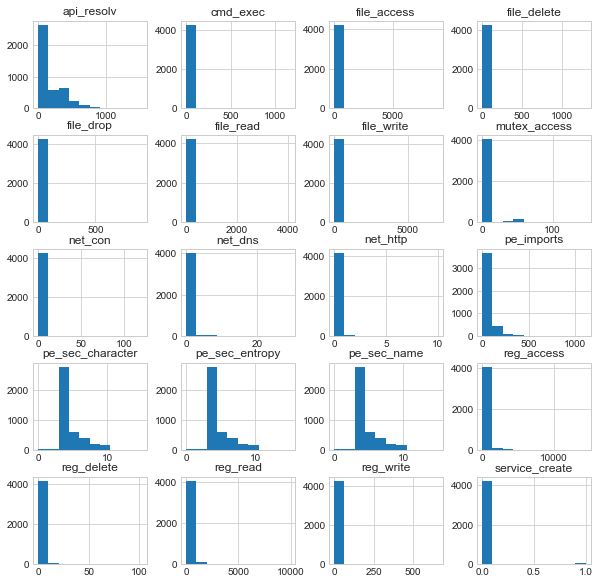

In [132]:
# histograms
# 1st 20 features
fig = pyplot.figure(figsize = (10,10))
ax = fig.gca()
df2_partial.hist(ax = ax,normed=False)
pyplot.show()

Density plot to assess the skewness in the features

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1727: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


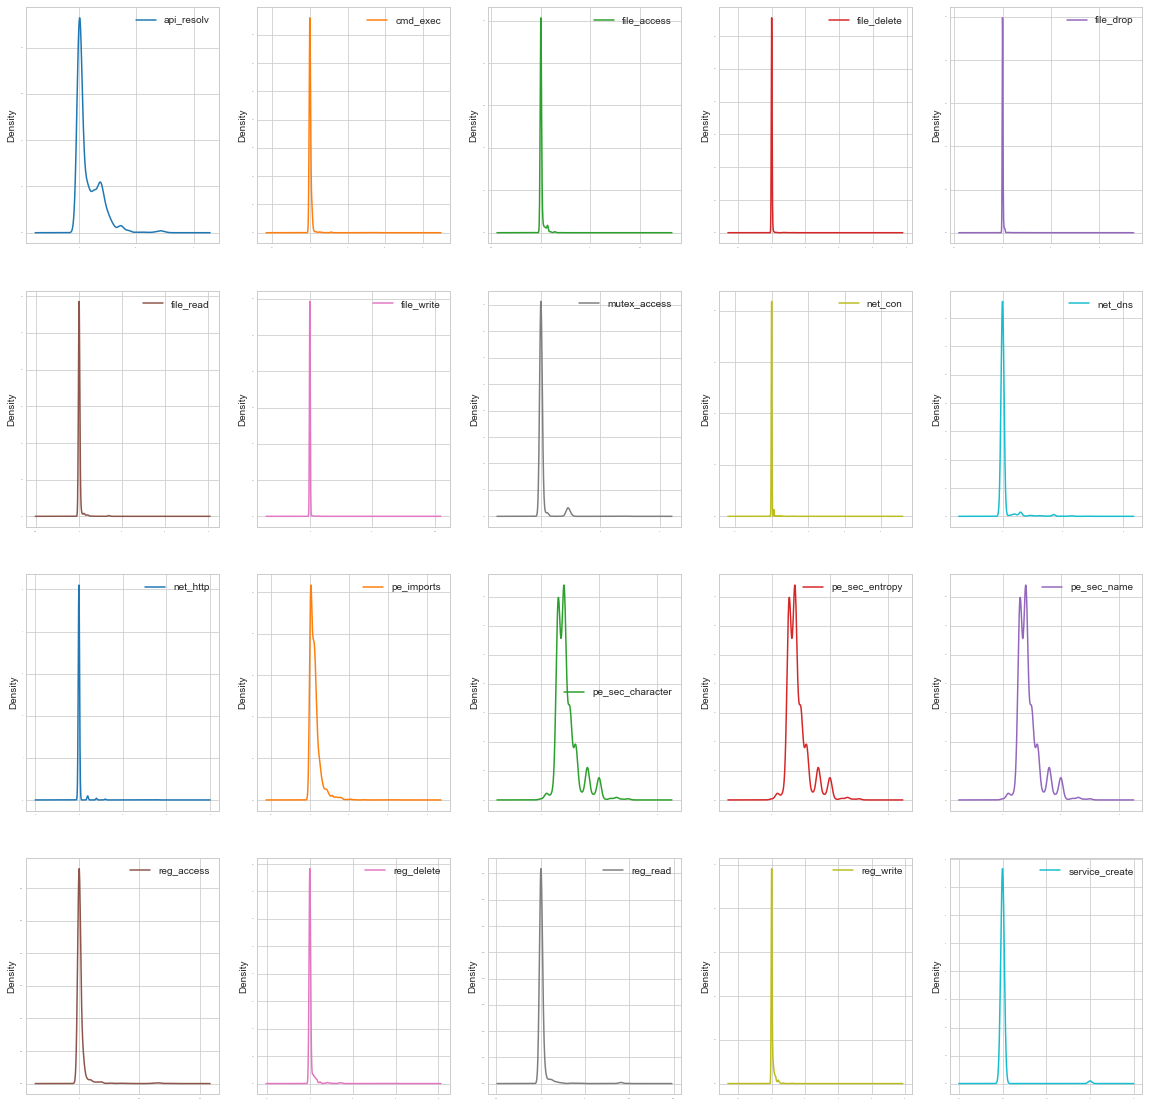

In [133]:
# density
# First 20 features

fig = pyplot.figure(figsize = (20,20))
ax = fig.gca()
df2_partial.plot(ax = ax, kind='density', subplots=True, layout=(4,5), sharex=False, legend=True,fontsize=1)
pyplot.show()

Box plot shows that there are a lot of outliers in the dataset

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1727: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


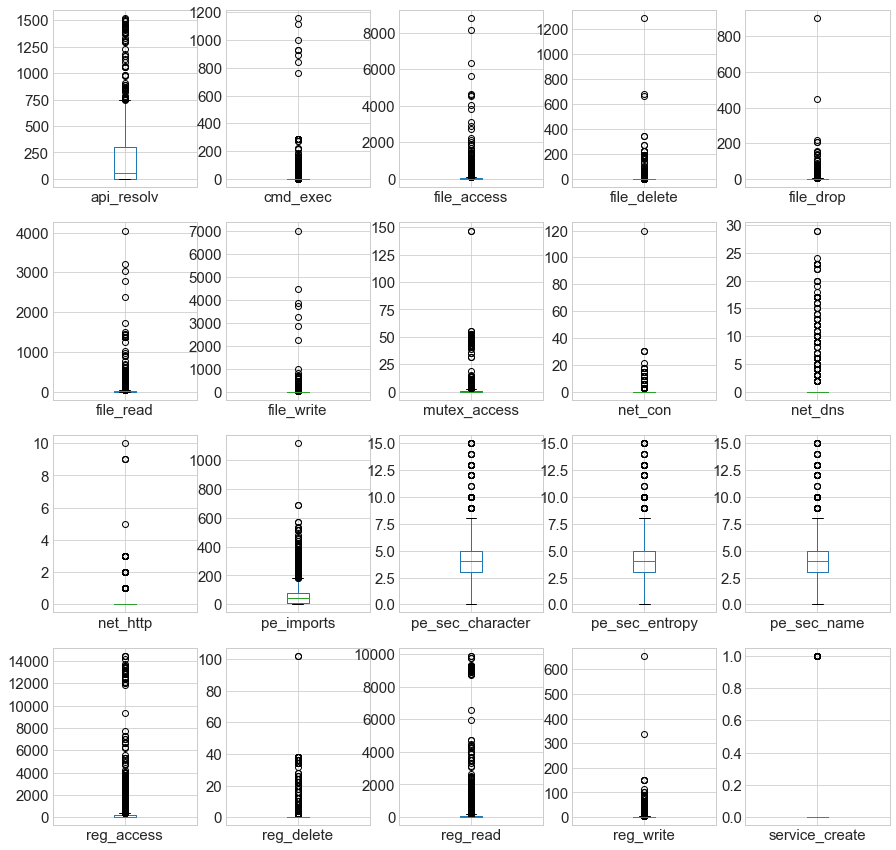

In [134]:
import matplotlib.cm as cm
# box and whisker plots
fig = pyplot.figure(figsize = (15,15))
ax = fig.gca()
df2_partial.plot(ax = ax, kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False, legend=True, fontsize=15)
pyplot.show()

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


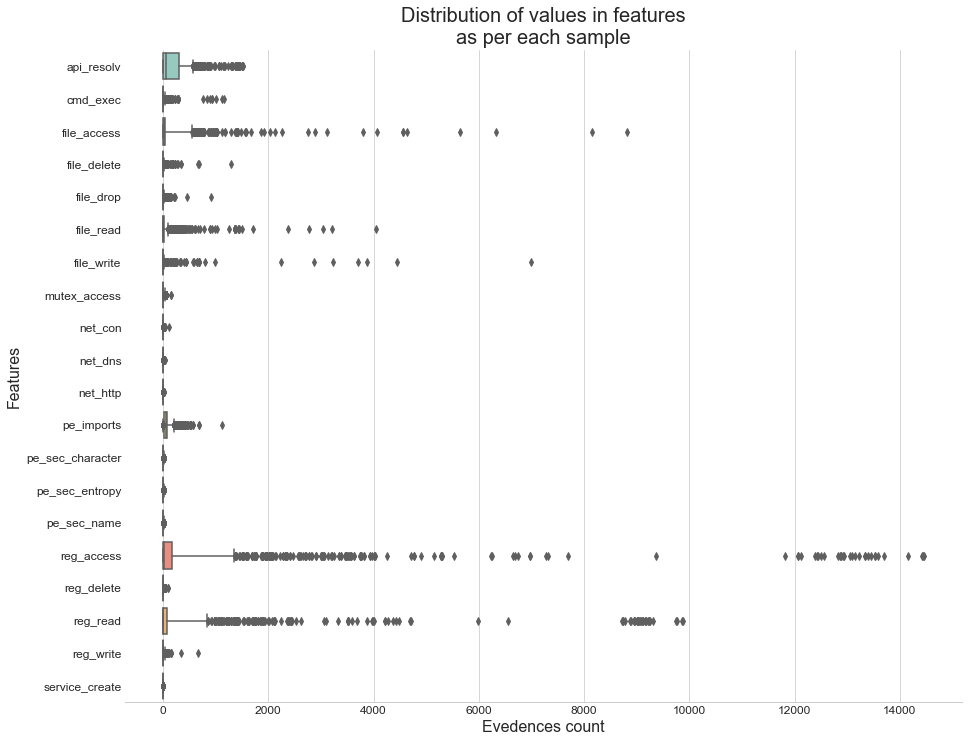

In [135]:
sns.set_style("whitegrid")

pyplot.figure(figsize=(15,12))

# create our boxplot which is drawn on an Axes object
bplot = sns.boxplot( data=df2_partial, whis=[5,95], palette="Set3", orient='h')

title = ('Distribution of values in features' 
         '\nas per each sample')

# We can call all the methods avaiable to Axes objects
bplot.set_title(title, fontsize=20)
bplot.set_xlabel('Evedences count', fontsize=16)
bplot.set_ylabel('Features', fontsize=16)
bplot.tick_params(axis='both', labelsize=12)

sns.despine(left=True) 

# plt.text(-1, -.5, 
#         'Data source: http://www.basketball-reference.com/draft/'
#        '\nAuthor: Savvas Tjortjoglou (savvastjortjoglou.com)'
#         '\nNote: Whiskers represent the 5th and 95th percentiles',
#          fontsize=12)
pyplot.show()

Correlation matrix to check the correlations among features.

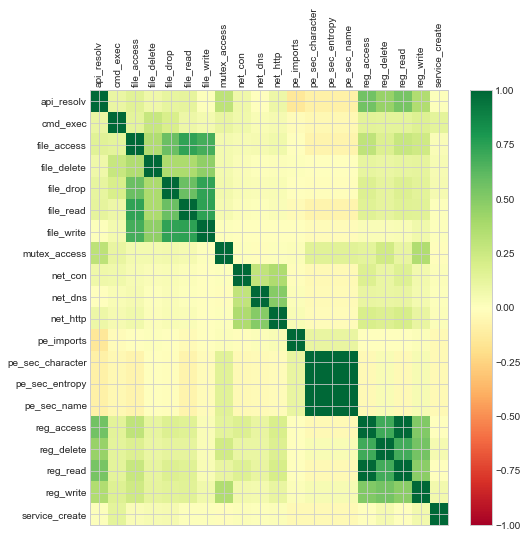

In [136]:
# correlation matrix

col_names = df2_partial.columns

fig = pyplot.figure(figsize = (8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(df2_partial.corr(),  vmin=-1, vmax=1,cmap="RdYlGn", interpolation='none',aspect='auto')
fig.colorbar(cax)

ticks = numpy.arange(0,20,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(col_names, rotation='vertical')
ax.set_yticklabels(col_names)
#pyplot.suptitle('AAAAAAAAAA', fontsize=15, fontweight='bold')
pyplot.show()



Scatter plot

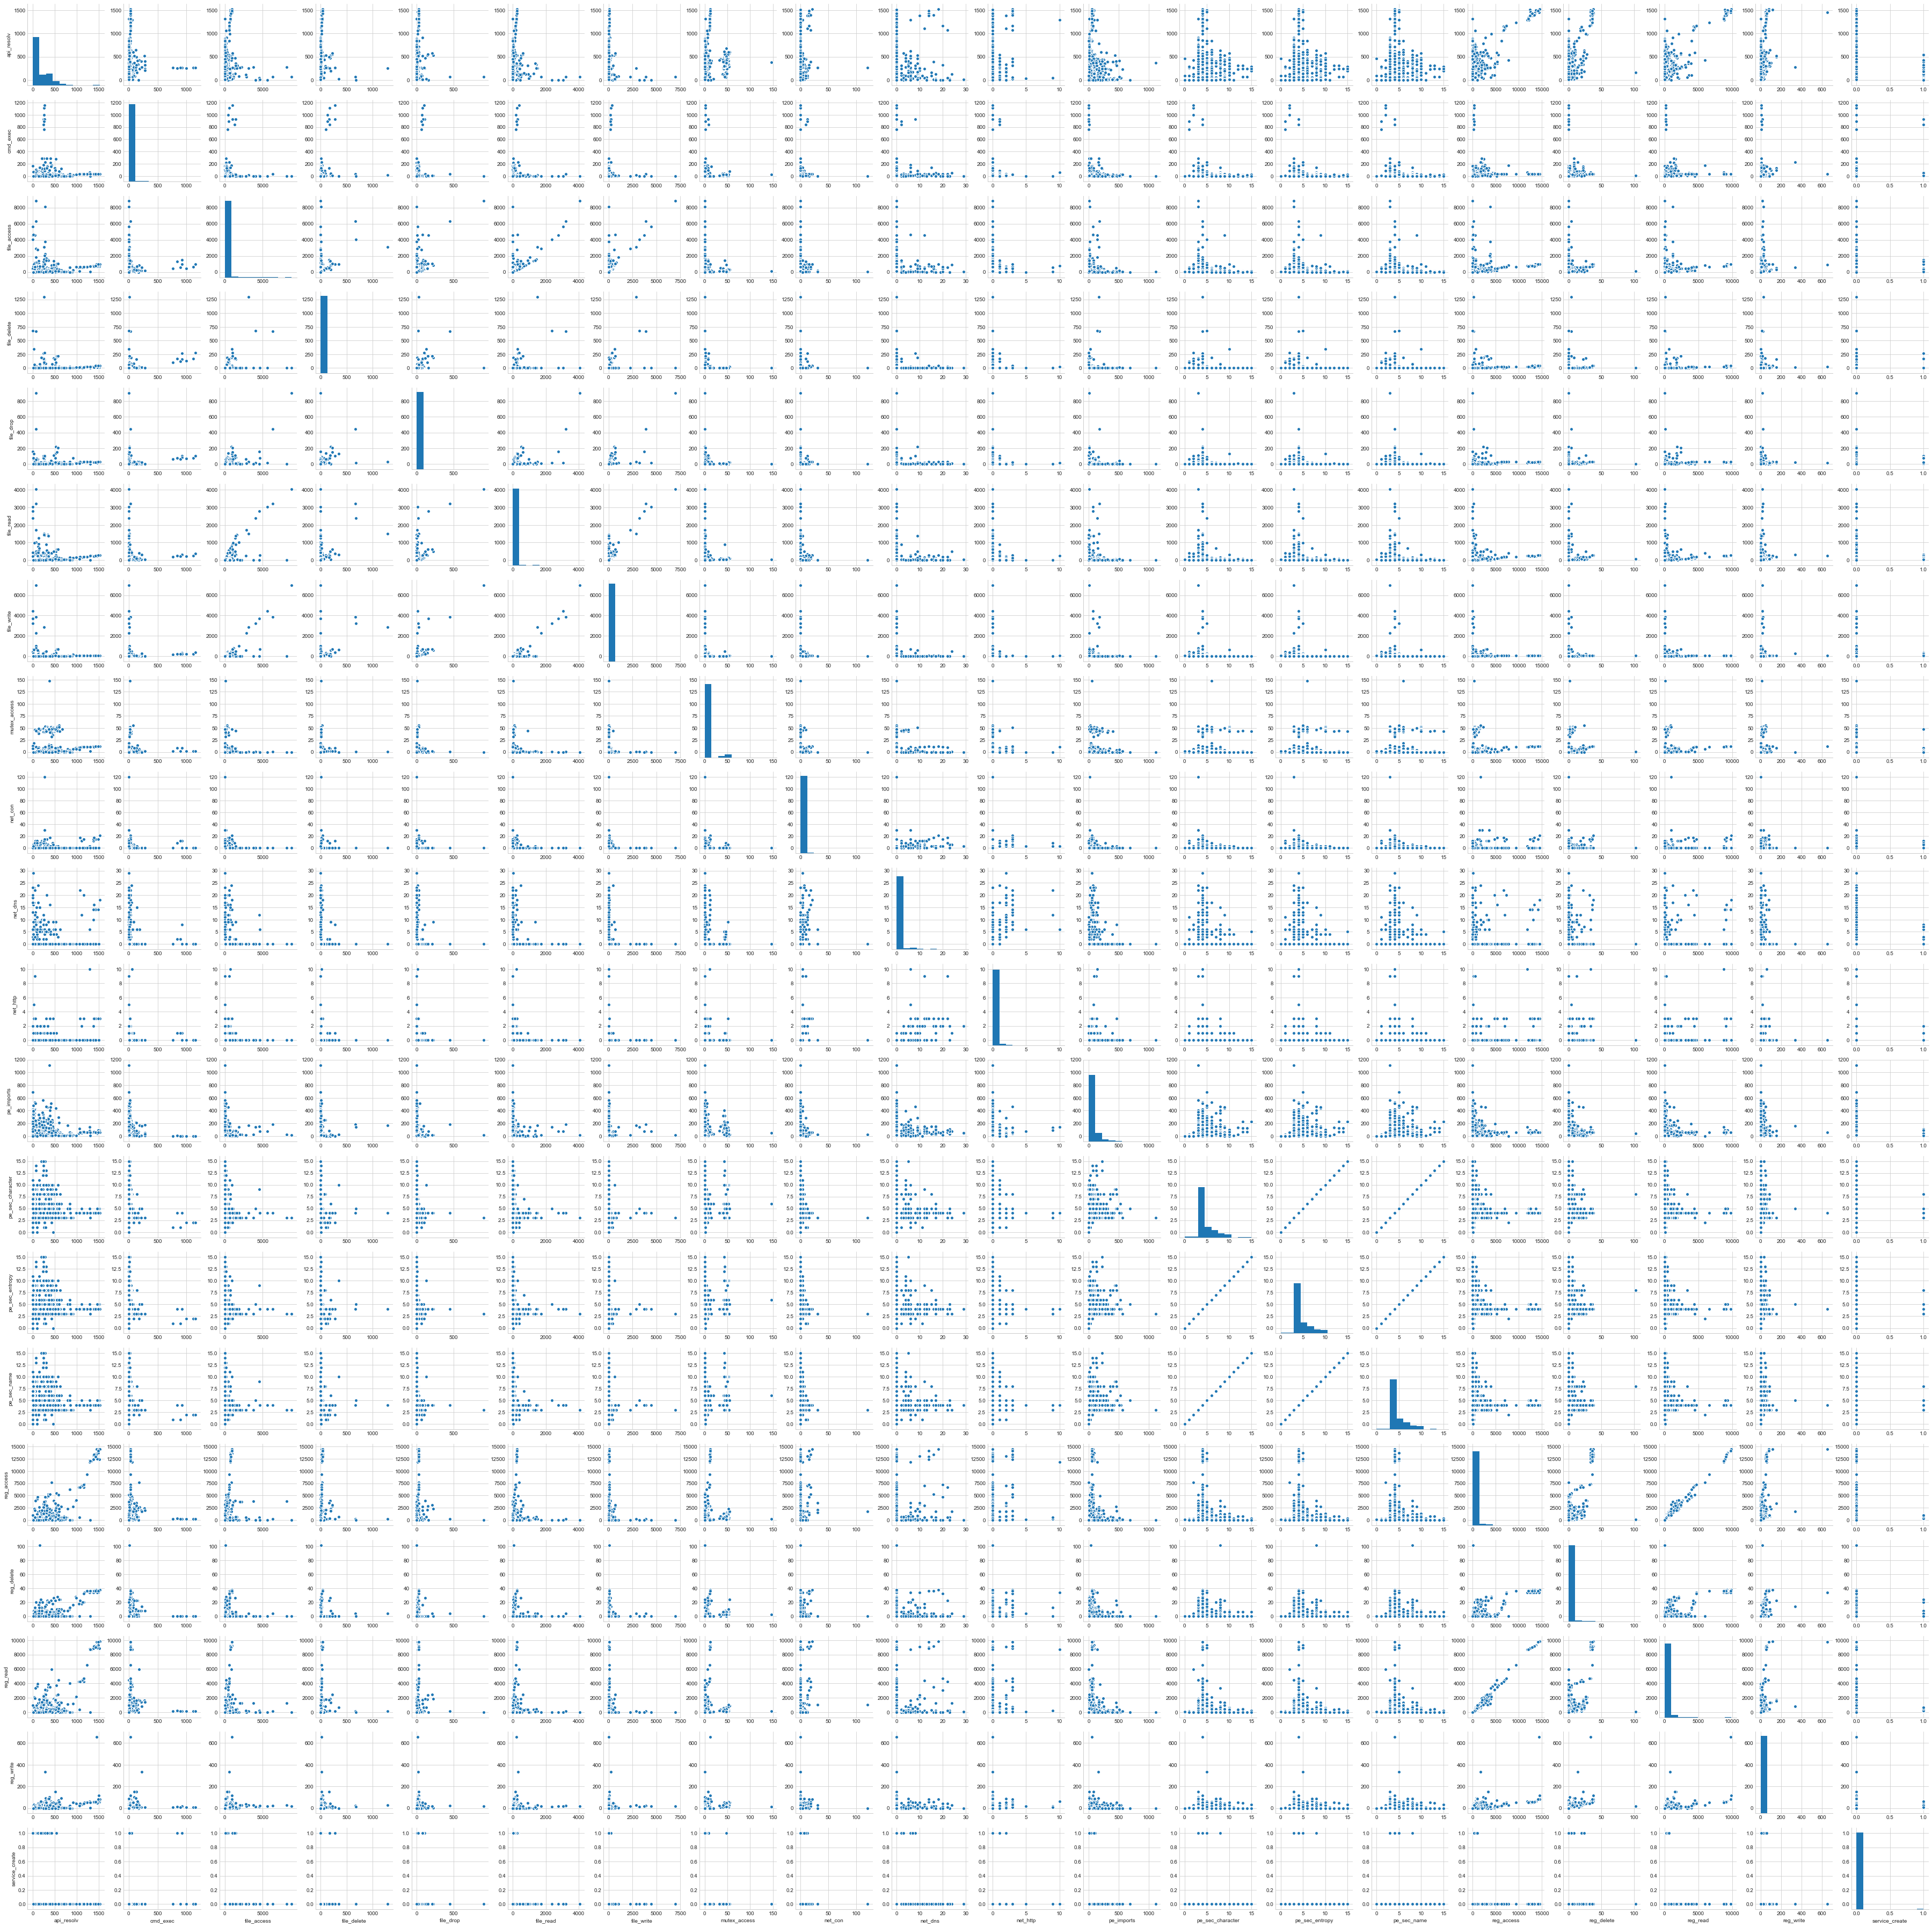

In [137]:
sns.pairplot(df2_partial, kind="scatter")

#### Plot of features occurances in the dataset¶

In [142]:
df2.head()

,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,net_dns,...,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str,label
0,37.0,NaN,12.0,NaN,2.0,9.0,3.0,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.0,APT1
1,39.0,NaN,12.0,NaN,2.0,9.0,3.0,1.0,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.0,APT1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,APT1
3,14.0,32.0,12.0,NaN,2.0,6.0,3.0,1.0,3.0,16.0,...,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,186.0,APT1
4,17.0,NaN,24.0,NaN,NaN,9.0,NaN,NaN,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,APT1


In [162]:
df2_desc = df2.describe()

In [163]:
df2_desc

,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,net_dns,...,sig_static_detection,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str
count,3232.000,957.000,3223.000,1003.000,1415.000,3174.000,1472.000,1351.000,187.000,275.000,...,324.000,1430.000,1.0,567.000,709.0,6.000,282.000,228.000,1.0,4284.000
mean,224.670,36.044,120.849,14.489,8.328,44.878,38.578,10.703,6.273,8.785,...,2.568,1.214,1.0,6.513,1.0,156.000,3.996,8.526,1.0,617.464
std,235.515,93.688,389.184,59.071,31.251,180.313,293.363,17.881,9.802,5.898,...,0.995,0.469,NaN,20.944,0.0,4.648,10.392,32.051,NaN,3029.336
min,1.000,2.000,3.000,3.000,2.000,3.000,3.000,1.000,3.000,2.000,...,2.000,1.000,1.0,2.000,1.0,150.000,1.000,3.000,1.0,1.000
25%,29.000,9.000,3.000,3.000,2.000,3.000,3.000,1.000,3.000,4.000,...,2.000,1.000,1.0,3.000,1.0,152.250,1.000,3.000,1.0,72.000
50%,162.000,24.000,15.000,3.000,2.000,12.000,6.000,2.000,3.000,6.000,...,2.000,1.000,1.0,3.000,1.0,159.000,1.000,3.000,1.0,164.000
75%,362.000,26.000,63.000,9.000,6.000,24.000,15.000,6.000,6.000,12.000,...,4.000,1.000,1.0,6.000,1.0,159.000,2.000,3.000,1.0,353.500
max,1522.000,1159.000,8817.000,1293.000,902.000,4050.000,6999.000,147.000,120.000,29.000,...,6.000,3.000,1.0,225.000,1.0,159.000,97.000,222.000,1.0,132987.000


In [164]:
df2_desc.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

We see that ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] are contained in the index. Let's change the index to a full column

In [165]:
df2_desc.reset_index(level=0, inplace=True)


In [166]:
df2_desc.head()

,index,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,...,sig_static_detection,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str
0,count,3232.000,957.000,3223.000,1003.000,1415.000,3174.000,1472.000,1351.000,187.000,...,324.000,1430.000,1.0,567.000,709.0,6.000,282.000,228.000,1.0,4284.000
1,mean,224.670,36.044,120.849,14.489,8.328,44.878,38.578,10.703,6.273,...,2.568,1.214,1.0,6.513,1.0,156.000,3.996,8.526,1.0,617.464
2,std,235.515,93.688,389.184,59.071,31.251,180.313,293.363,17.881,9.802,...,0.995,0.469,NaN,20.944,0.0,4.648,10.392,32.051,NaN,3029.336
3,min,1.000,2.000,3.000,3.000,2.000,3.000,3.000,1.000,3.000,...,2.000,1.000,1.0,2.000,1.0,150.000,1.000,3.000,1.0,1.000
4,25%,29.000,9.000,3.000,3.000,2.000,3.000,3.000,1.000,3.000,...,2.000,1.000,1.0,3.000,1.0,152.250,1.000,3.000,1.0,72.000


In [168]:
#select all from index where index = count
df2_desc_feature_occ = df2_desc[df2_desc['index']=='count']
df2_desc_feature_occ

,index,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,...,sig_static_detection,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str
0,count,3232.0,957.0,3223.0,1003.0,1415.0,3174.0,1472.0,1351.0,187.0,...,324.0,1430.0,1.0,567.0,709.0,6.0,282.0,228.0,1.0,4284.0


C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


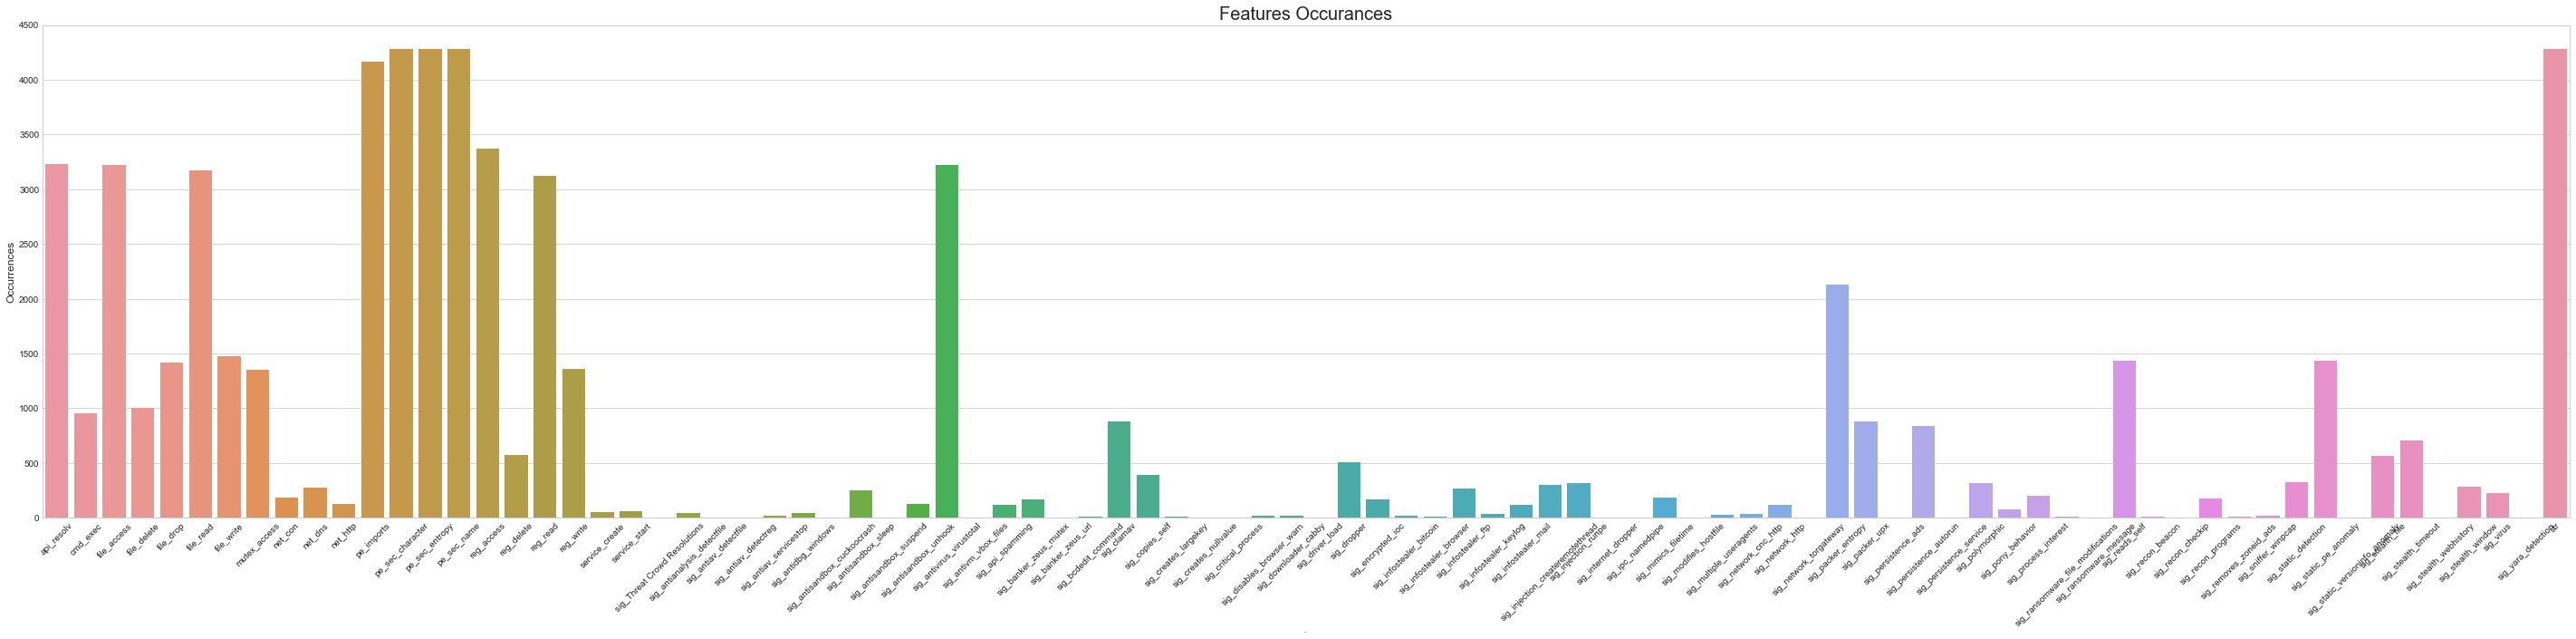

In [169]:
#A plot that shows the occurances of features in the dataset
pyplot.figure(figsize=(50,10))
sns.barplot(data=df2_desc_feature_occ)
pyplot.title('Features Occurances',fontsize=20)
pyplot.ylabel('Occurrences', fontsize=12)
pyplot.xlabel('Features', fontsize=1)
pyplot.xticks(rotation=45)
pyplot.show()

#### Counting the number of feature occurances by category/class

In [170]:
df2.groupby('label').count()

,api_resolv,cmd_exec,file_access,file_delete,file_drop,file_read,file_write,mutex_access,net_con,net_dns,...,sig_static_detection,sig_static_pe_anomaly,sig_static_versioninfo_anomaly,sig_stealth_file,sig_stealth_timeout,sig_stealth_webhistory,sig_stealth_window,sig_virus,sig_yara_detection,str
label,,,,,,,,,,,,,,,,,,,,,
APT1,247,87,262,70,90,255,120,88,54,67,...,0,25,1,10,25,0,45,0,0,286
Crypto,1494,391,1345,404,599,1324,582,526,48,59,...,0,710,0,255,406,4,120,118,0,1813
Locker,406,182,385,208,266,383,310,278,40,56,...,0,231,0,107,26,0,36,10,0,414
Zeus,950,294,877,321,452,864,450,392,36,44,...,0,460,0,193,248,2,81,100,0,1142
shadowbrokers,135,3,354,0,8,348,10,67,9,49,...,324,4,0,2,4,0,0,0,1,629


In [171]:
df2_desc_feature_occ_per_cat = df2.groupby('label').count()

In [172]:
df2_desc_feature_occ_per_cat.reset_index(level=0, inplace=True)

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


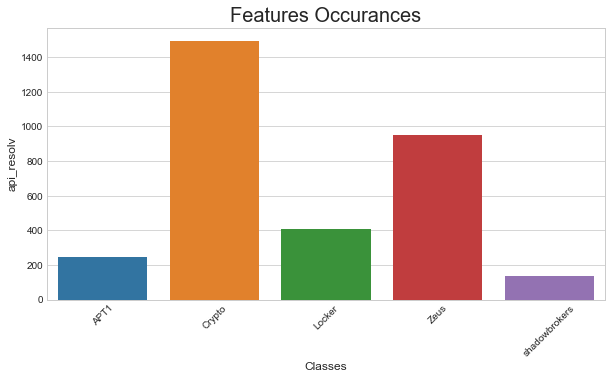

In [174]:
pyplot.figure(figsize=(10,5))
sns.barplot(x='label', y='api_resolv', data=df2_desc_feature_occ_per_cat)
pyplot.title('Features Occurances',fontsize=20)
pyplot.ylabel('api_resolv', fontsize=12)
pyplot.xlabel('Classes', fontsize=12)
pyplot.xticks(rotation=45)
pyplot.show()

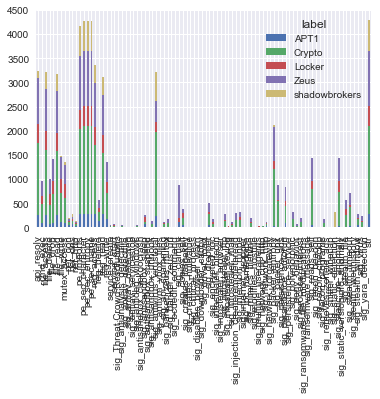

In [175]:
import seaborn as sns
sns.set()
df2_desc_feature_occ_per_cat.set_index('label').T.plot(kind='bar', stacked=True)

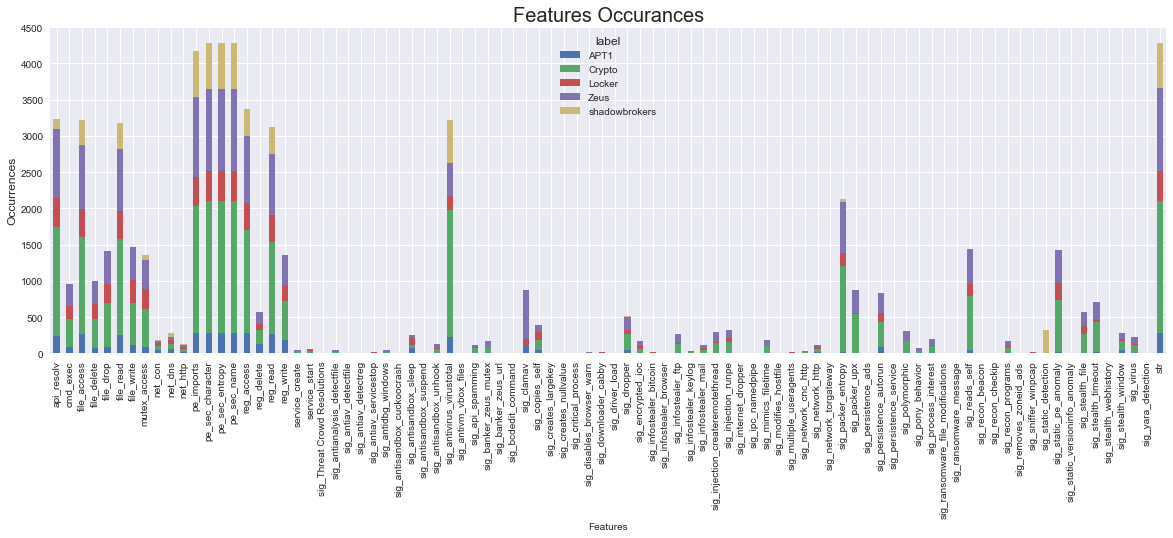

In [177]:
# Using T stacked plot to visualize the quantity of each feature per class

#plt.figure(figsize=(50,10))
df2_desc_feature_occ_per_cat.set_index('label').T.plot(kind='bar', stacked=True,figsize=(20,6))
pyplot.title('Features Occurances',fontsize=20)
pyplot.ylabel('Occurrences', fontsize=12)
pyplot.xlabel('Features', fontsize=10)
#plt.xticks(rotation=45)
pyplot.show()

# Experiments and model building

#### Coding categorical feature values

In [198]:
import warnings
warnings.filterwarnings("ignore")

In [185]:
df3 = df2.copy()
df3 = df3.fillna(0)

In [192]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding empty values as 0:
#df5a_select_class.drop(columns=['Unnamed'],axis=1)

df3["label_coded"] = coding(df3["label"],{'APT1':0, 'Crypto':1, 'Locker':2, 'shadowbrokers':3, 'Zeus':4})
print ('Done')

#Drop the categorical label feature
df3 = df3.drop(columns=['label'],axis=1)

Done


In [193]:
#df3['label_coded'].unique()


### Evaluate on ALL data (Unstandardized)

In [203]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


#Split-out validation dataset
df3_no_label = df3.drop('label_coded',1)
array_ds_full = df3.values
X2 = df3_no_label.copy()
Y2 = df3["label_coded"]
validation_size = 0.20

X_train, X_validation, Y_train, Y_validation = train_test_split(X2, Y2,test_size=validation_size, random_state=seed)


# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2





# Spot-Check Algorithms 7 algo and count times
import time
start = time.time()

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLR',LogisticRegression(multi_class='multinomial', solver='newton-cg')))

results = []
names = []
report_msg = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>> ALL data (Unstandardized) \nModels' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

LR --> is training now... 
LDA --> is training now... 
KNN --> is training now... 
CART --> is training now... 
NB --> is training now... 
SVM --> is training now... 
MLR --> is training now... 

End of training.>>> ALL data (Unstandardized) 
Models' accuracies and times used are:
------------------------------------

LR: 0.770984 (0.023490) , time: 14.979491 seconds
LDA: 0.754952 (0.023697) , time: 0.395263 seconds
KNN: 0.684353 (0.028420) , time: 0.627918 seconds
CART: 0.870187 (0.022568) , time: 0.668445 seconds
NB: 0.508733 (0.047397) , time: 0.170616 seconds
SVM: 0.463539 (0.023257) , time: 45.850226 seconds
MLR: 0.872217 (0.016591) , time: 183.439169 seconds


### Evaluate on SELECTED data (Unstandardized)

In [201]:
#evaluation on selected features
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


#Split-out validation dataset
df3_no_label = df3.drop('label_coded',1)
array_ds_full = df3.values
X2 = df3_no_label.copy()
Y2 = df3["label_coded"]
validation_size = 0.20

X_train, X_validation, Y_train, Y_validation = train_test_split(X2, Y2,test_size=validation_size, random_state=seed)


# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



# feature extraction
select = SelectKBest(score_func=chi2, k=50)
selected_features = select.fit(X2, Y2)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [df3_no_label.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
#X_test_selected = X_test[colnames_selected]



# Spot-Check Algorithms 7 algo and count times
import time
start = time.time()

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLR',LogisticRegression(multi_class='multinomial', solver='newton-cg')))

results = []
names = []
report_msg = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train_selected, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>> ALL data (Unstandardized) \nModels' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

LR --> is training now... 
LDA --> is training now... 
KNN --> is training now... 
CART --> is training now... 
NB --> is training now... 
SVM --> is training now... 
MLR --> is training now... 

End of training.>>> ALL data (Unstandardized) 
Models' accuracies and times used are:
------------------------------------

LR: 0.764565 (0.022976) , time: 10.375167 seconds
LDA: 0.739782 (0.020999) , time: 0.228172 seconds
KNN: 0.685228 (0.025515) , time: 0.291214 seconds
CART: 0.866985 (0.013055) , time: 0.315398 seconds
NB: 0.533833 (0.037610) , time: 0.074061 seconds
SVM: 0.435534 (0.023315) , time: 24.411040 seconds
MLR: 0.873386 (0.014982) , time: 127.921090 seconds


#### Evaluate on ALL data (standardized) --> StandardScaler

In [204]:
# Standardize the dataset with StandardScaler
import time
start = time.time()

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledMLR', Pipeline([('Scaler', StandardScaler()),('MLR', 
                                                LogisticRegression(multi_class='multinomial', solver='newton-cg'))])))



results = []
names = []
report_msg = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>> ALL data (standardized) --> StandardScaler \nScaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

ScaledLR --> is training now... 
ScaledLDA --> is training now... 
ScaledKNN --> is training now... 
ScaledCART --> is training now... 
ScaledNB --> is training now... 
ScaledSVM --> is training now... 
ScaledMLR --> is training now... 

End of training.>>> ALL data (standardized) --> StandardScaler 
Scaled Models' accuracies and times used are:
------------------------------------

ScaledLR: 0.868427 (0.016297) , time: 9.881966 seconds
ScaledLDA: 0.754952 (0.023697) , time: 0.445805 seconds
ScaledKNN: 0.822051 (0.015841) , time: 1.861743 seconds
ScaledCART: 0.870776 (0.016094) , time: 0.524350 seconds
ScaledNB: 0.413379 (0.054921) , time: 0.225151 seconds
ScaledSVM: 0.857041 (0.027118) , time: 8.208975 seconds
ScaledMLR: 0.870175 (0.016725) , time: 6.747002 seconds


#### Evaluate on SELECTED data (standardized) --> StandardScaler

In [206]:
# Standardize the dataset with StandardScaler
import time
start = time.time()

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledMLR', Pipeline([('Scaler', StandardScaler()),('MLR', 
                                                LogisticRegression(multi_class='multinomial', solver='newton-cg'))])))



results = []
names = []
report_msg = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train_selected, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>> ALL data (standardized) --> StandardScaler \nScaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

ScaledLR --> is training now... 
ScaledLDA --> is training now... 
ScaledKNN --> is training now... 
ScaledCART --> is training now... 
ScaledNB --> is training now... 
ScaledSVM --> is training now... 
ScaledMLR --> is training now... 

End of training.>>> ALL data (standardized) --> StandardScaler 
Scaled Models' accuracies and times used are:
------------------------------------

ScaledLR: 0.861135 (0.016484) , time: 5.010342 seconds
ScaledLDA: 0.739782 (0.020999) , time: 0.273682 seconds
ScaledKNN: 0.849175 (0.016388) , time: 1.081723 seconds
ScaledCART: 0.869897 (0.020126) , time: 0.378752 seconds
ScaledNB: 0.513718 (0.057772) , time: 0.134592 seconds
ScaledSVM: 0.861127 (0.022278) , time: 4.820714 seconds
ScaledMLR: 0.870174 (0.017921) , time: 4.241837 seconds


#### Evaluate on ALL data (standardized) --> RobustScaler

In [207]:
# Standardize the dataset with RobustScaler
import time
start = time.time()

pipelines = []
pipelines.append(('RbScaledLR', Pipeline([('RbScaler', RobustScaler()),('LR', LogisticRegression())])))
pipelines.append(('RbScaledLDA', Pipeline([('RbScaler', RobustScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('RbScaledKNN', Pipeline([('RbScaler', RobustScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('RbScaledCART', Pipeline([('RbScaler', RobustScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('RbScaledNB', Pipeline([('RbScaler', RobustScaler()),('NB', GaussianNB())])))
pipelines.append(('RbScaledSVM', Pipeline([('RbScaler', RobustScaler()),('SVM', SVC())])))
pipelines.append(('RbScaledMLR', Pipeline([('Scaler', StandardScaler()),('MLR', 
                                                LogisticRegression(multi_class='multinomial', solver='newton-cg'))])))

results = []
names = []
report_msg = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>>ALL data (standardized) --> RobustScaler \nRobust Scaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

RbScaledLR --> is training now... 
RbScaledLDA --> is training now... 
RbScaledKNN --> is training now... 
RbScaledCART --> is training now... 
RbScaledNB --> is training now... 
RbScaledSVM --> is training now... 
RbScaledMLR --> is training now... 

End of training.>>>ALL data (standardized) --> RobustScaler 
Robust Scaled Models' accuracies and times used are:
------------------------------------

RbScaledLR: 0.869591 (0.019001) , time: 6.788027 seconds
RbScaledLDA: 0.754952 (0.023697) , time: 0.512841 seconds
RbScaledKNN: 0.753494 (0.021823) , time: 1.410941 seconds
RbScaledCART: 0.866977 (0.022920) , time: 0.567878 seconds
RbScaledNB: 0.490653 (0.077839) , time: 0.271682 seconds
RbScaledSVM: 0.779745 (0.015314) , time: 12.594401 seconds
RbScaledMLR: 0.870175 (0.016725) , time: 7.081731 seconds


#### Evaluate on SELECTED data (standardized) --> RobustScaler

In [208]:
# Standardize the dataset with RobustScaler
import time
start = time.time()

pipelines = []
pipelines.append(('RbScaledLR', Pipeline([('RbScaler', RobustScaler()),('LR', LogisticRegression())])))
pipelines.append(('RbScaledLDA', Pipeline([('RbScaler', RobustScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('RbScaledKNN', Pipeline([('RbScaler', RobustScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('RbScaledCART', Pipeline([('RbScaler', RobustScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('RbScaledNB', Pipeline([('RbScaler', RobustScaler()),('NB', GaussianNB())])))
pipelines.append(('RbScaledSVM', Pipeline([('RbScaler', RobustScaler()),('SVM', SVC())])))
pipelines.append(('RbScaledMLR', Pipeline([('Scaler', StandardScaler()),('MLR', 
                                                LogisticRegression(multi_class='multinomial', solver='newton-cg'))])))

results = []
names = []
report_msg = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train_selected, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>>ALL data (standardized) --> RobustScaler \nRobust Scaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

RbScaledLR --> is training now... 
RbScaledLDA --> is training now... 
RbScaledKNN --> is training now... 
RbScaledCART --> is training now... 
RbScaledNB --> is training now... 
RbScaledSVM --> is training now... 
RbScaledMLR --> is training now... 

End of training.>>>ALL data (standardized) --> RobustScaler 
Robust Scaled Models' accuracies and times used are:
------------------------------------

RbScaledLR: 0.867263 (0.013447) , time: 4.843231 seconds
RbScaledLDA: 0.739782 (0.020999) , time: 0.297197 seconds
RbScaledKNN: 0.778295 (0.022100) , time: 0.883089 seconds
RbScaledCART: 0.869314 (0.014313) , time: 0.450801 seconds
RbScaledNB: 0.530919 (0.043609) , time: 0.199634 seconds
RbScaledSVM: 0.779164 (0.012721) , time: 9.103575 seconds
RbScaledMLR: 0.870174 (0.017921) , time: 4.176807 seconds


#### Evaluate on selected data (standardized) --> StandardScaler with ANOVA

In [222]:

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


X_train, X_validation, Y_train, Y_validation = train_test_split(X2, Y2,test_size=validation_size, random_state=seed)


# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



# feature extraction
select = SelectKBest(f_classif, k=50)
selected_features = select.fit(X2, Y2)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [df3_no_label.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]



# Spot-Check Algorithms 7 algo and count times
import time
start = time.time()



# Standardize the dataset with StandardScaler


pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScaledMLR', Pipeline([('Scaler', StandardScaler()),('MLR', 
                                                LogisticRegression(multi_class='multinomial', solver='newton-cg'))])))

results = []
names = []
report_msg = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train_selected, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>> selected data (standardized) --> StandardScaler with ANOVA \nScaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

ScaledLR --> is training now... 
ScaledLDA --> is training now... 
ScaledKNN --> is training now... 
ScaledCART --> is training now... 
ScaledNB --> is training now... 
ScaledSVM --> is training now... 
ScaledMLR --> is training now... 

End of training.>>> selected data (standardized) --> StandardScaler with ANOVA 
Scaled Models' accuracies and times used are:
------------------------------------

ScaledLR: 0.865807 (0.017300) , time: 4.963810 seconds
ScaledLDA: 0.752620 (0.017802) , time: 0.291694 seconds
ScaledKNN: 0.825549 (0.012845) , time: 1.232323 seconds
ScaledCART: 0.869019 (0.018827) , time: 0.433789 seconds
ScaledNB: 0.567400 (0.057940) , time: 0.141595 seconds
ScaledSVM: 0.866378 (0.023595) , time: 5.517180 seconds
ScaledMLR: 0.871349 (0.016045) , time: 4.753670 seconds


#### Evaluate on selected data (standardized) --> RobustScaler with ANOVA¶

In [221]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


X_train, X_validation, Y_train, Y_validation = train_test_split(X2, Y2,test_size=validation_size, random_state=seed)


# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



# feature extraction
select = SelectKBest(f_classif, k=50)
selected_features = select.fit(X2, Y2)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [df3_no_label.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]

# Standardize the dataset with RobustScaler
import time
start = time.time()

pipelines = []
pipelines.append(('RbScaledLR', Pipeline([('RbScaler', RobustScaler()),('LR', LogisticRegression())])))
pipelines.append(('RbScaledLDA', Pipeline([('RbScaler', RobustScaler()),('LDA', LinearDiscriminantAnalysis())])))

pipelines.append(('RbScaledKNN', Pipeline([('RbScaler', RobustScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('RbScaledCART', Pipeline([('RbScaler', RobustScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('RbScaledNB', Pipeline([('RbScaler', RobustScaler()),('NB', GaussianNB())])))
pipelines.append(('RbScaledSVM', Pipeline([('RbScaler', RobustScaler()),('SVM', SVC())])))
pipelines.append(('RbScaledMLR', Pipeline([('Scaler', StandardScaler()),('MLR', 
                                                LogisticRegression(multi_class='multinomial', solver='newton-cg'))])))

results = []
names = []
report_msg = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train_selected, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>>ALL data (standardized) --> RobustScaler \nRobust Scaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

RbScaledLR --> is training now... 
RbScaledLDA --> is training now... 
RbScaledKNN --> is training now... 
RbScaledCART --> is training now... 
RbScaledNB --> is training now... 
RbScaledSVM --> is training now... 
RbScaledMLR --> is training now... 

End of training.>>>ALL data (standardized) --> RobustScaler 
Robust Scaled Models' accuracies and times used are:
------------------------------------

RbScaledLR: 0.868725 (0.014333) , time: 5.727321 seconds
RbScaledLDA: 0.752620 (0.017802) , time: 0.356739 seconds
RbScaledKNN: 0.757289 (0.022846) , time: 1.178787 seconds
RbScaledCART: 0.873979 (0.016685) , time: 0.527852 seconds
RbScaledNB: 0.589267 (0.031402) , time: 0.192128 seconds
RbScaledSVM: 0.779453 (0.016132) , time: 9.965648 seconds
RbScaledMLR: 0.871349 (0.016045) , time: 4.684644 seconds


## Evaluation by Standardization (RobustScaler)--> Dimensionality Reducer(ANOVA) --> Ensemble Models

In [220]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


X_train, X_validation, Y_train, Y_validation = train_test_split(X2, Y2,test_size=validation_size, random_state=seed)


# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



# feature extraction
select = SelectKBest(f_classif, k=50)
selected_features = select.fit(X2, Y2)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [df3_no_label.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]

# Standardize the dataset with RobustScaler
import time
start = time.time()

pipelines = []
pipelines.append(('RbScaledAB', Pipeline([('RbScaler', RobustScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('RbScaledLGBM', Pipeline([('RbScaler', RobustScaler()),('GBM', GradientBoostingClassifier())])))

pipelines.append(('RbScaledRF', Pipeline([('RbScaler', RobustScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('RbScaledET', Pipeline([('RbScaler', RobustScaler()),('ET', ExtraTreesClassifier())])))


results = []
names = []
report_msg = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train_selected, Y_train, cv=kfold, scoring=scoring)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed)
    report_msg.append(msg)
print("\nEnd of training.>>>ALL data (standardized) --> RobustScaler \nRobust Scaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

RbScaledAB --> is training now... 
RbScaledLGBM --> is training now... 
RbScaledRF --> is training now... 
RbScaledET --> is training now... 

End of training.>>>ALL data (standardized) --> RobustScaler 
Robust Scaled Models' accuracies and times used are:
------------------------------------

RbScaledAB: 0.677086 (0.074955) , time: 3.272682 seconds
RbScaledLGBM: 0.933486 (0.013557) , time: 37.121413 seconds
RbScaledRF: 0.912488 (0.014089) , time: 0.647430 seconds
RbScaledET: 0.895559 (0.012551) , time: 0.793529 seconds


In [219]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


X_train, X_validation, Y_train, Y_validation = train_test_split(X2, Y2,test_size=validation_size, random_state=seed)


# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



# feature extraction
select = SelectKBest(f_classif, k=50)
selected_features = select.fit(X2, Y2)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [df3_no_label.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]




# Standardize the dataset with RobustScaler
import time
start = time.time()


pipelines = []
pipelines.append(('RbScaledAB', Pipeline([('RbScaler', RobustScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('RbScaledLGBM', Pipeline([('RbScaler', RobustScaler()),('GBM', GradientBoostingClassifier())])))

pipelines.append(('RbScaledRF', Pipeline([('RbScaler', RobustScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('RbScaledET', Pipeline([('RbScaler', RobustScaler()),('ET', ExtraTreesClassifier())])))


results = []
names = []
report_msg = []
matrix_rpt = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    start = time.time()
    cv_results = cross_val_score(model, X_train_selected, Y_train, cv=kfold, scoring=scoring)
    model.fit(X_train, Y_train)
    predicted = model.predict(X_validation)
    matrix = confusion_matrix(Y_validation, predicted)
    classification_rpt = classification_report(Y_validation, predicted)
    print(name,"--> is training now... ")
    end = time.time()
    seconds_elapsed = end - start
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f) , time: %f seconds,\n\n%s,\n\n%s" % (name, cv_results.mean(), cv_results.std(),seconds_elapsed,matrix,classification_rpt)
    matrix_rpt.append(matrix)
    report_msg.append(msg)
print("\nEnd of training.>>>ALL data (standardized) --> RobustScaler \nRobust Scaled Models' accuracies and times used are:")
print("------------------------------------\n")
print ('\n'.join(report_msg))

RbScaledAB --> is training now... 
RbScaledLGBM --> is training now... 
RbScaledRF --> is training now... 
RbScaledET --> is training now... 

End of training.>>>ALL data (standardized) --> RobustScaler 
Robust Scaled Models' accuracies and times used are:
------------------------------------

RbScaledAB: 0.677086 (0.074955) , time: 3.874645 seconds,

[[ 32   4   7   0   4]
 [  2 288  72   4  15]
 [ 10  15  54   0  17]
 [  5   0   1 118   0]
 [ 15   3  56   0 136]],

             precision    recall  f1-score   support

          0       0.50      0.68      0.58        47
          1       0.93      0.76      0.83       381
          2       0.28      0.56      0.38        96
          3       0.97      0.95      0.96       124
          4       0.79      0.65      0.71       210

avg / total       0.81      0.73      0.76       858

RbScaledLGBM: 0.933485 (0.013435) , time: 39.801591 seconds,

[[ 37   5   0   0   5]
 [  1 368   2   2   8]
 [  5  12  69   0  10]
 [  1   0   0 123   0]


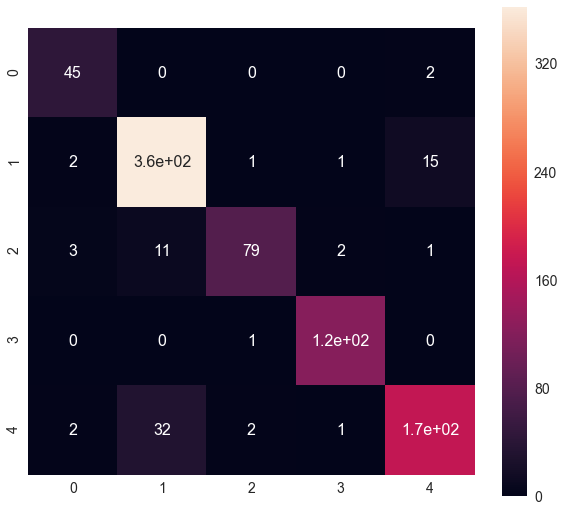

In [224]:
pyplot.figure(figsize = (10,9))
sns.set(font_scale=1.4)
sns.heatmap(matrix,annot=True, square=True,annot_kws={"size": 16})

### ROC(AUC) performance of the best model GBM¶

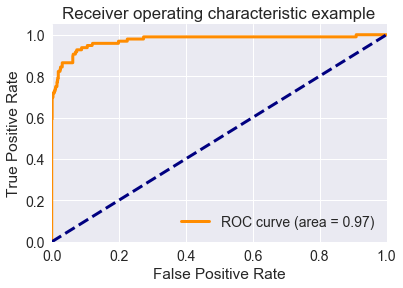

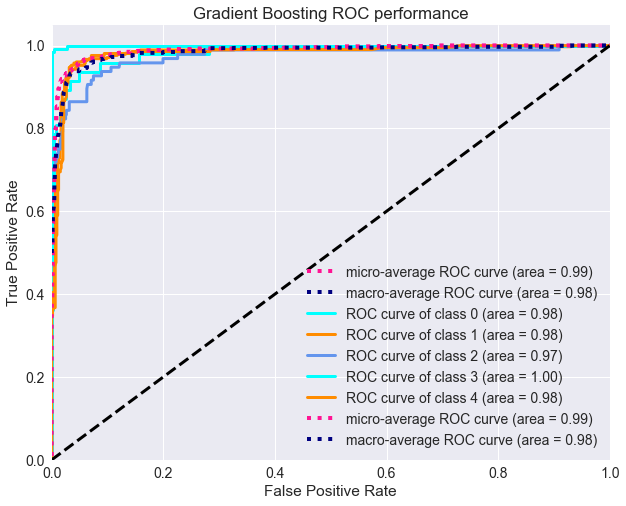

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

#evaluation on selected features
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


#Split-out validation dataset
df3_no_label = df3.drop('label_coded',1)
array_ds_full = df3.values
X = df3_no_label.copy()
y = df3["label_coded"]
validation_size = 0.20


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2,3,4])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size,random_state=seed)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(GradientBoostingClassifier())
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

########################################################################################

pyplot.figure()
lw = 3
pyplot.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
pyplot.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic example')
pyplot.legend(loc="lower right")
pyplot.show()
###############################################################################################

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    pyplot.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


pyplot.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

pyplot.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','greenyellow','green'])

   

pyplot.plot([0, 1], [0, 1], 'k--', lw=lw)
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#pyplot.title('Some extension of Receiver operating characteristic to multi-class')
pyplot.title('Gradient Boosting ROC performance')
pyplot.legend(loc="lower right")
pyplot.show()